<h2>Bayesian Inference of the mean of a Gaussian</h2>
<p>In this notebook, we will use Bayesian inference to infer the mean of a Gaussian. We assume that we observe $N$ values that have come from a Gaussian with mean $\mu$ and variancs $\sigma^2$. Assuming that we know $\sigma^2=1$, we would like to determine $\mu$.</p>

<p>We start by defining a prior density on $\mu$. We will use a Gaussian as our likelihood will be Gaussian (as per our assumption above) and the Gaussian prior is conjugate to the Gaussian likelihood. We (arbitrarily - in real problems you should think carefully about prior values) choose a prior with mean $a=0$ and variance $b^2=1$</p>

In [1]:
import numpy as np
true_mu = 2.0
a = 0
b_sq = 1
sig_sq = 1
x = np.random.normal(true_mu,np.sqrt(sig_sq),(10,1))

<p>The plot below shows our choice of prior density:</p>

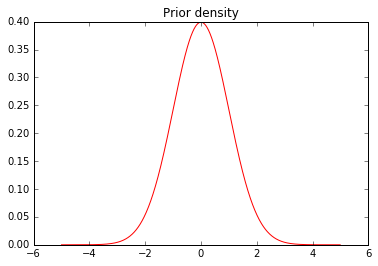

In [2]:
import pylab as plt
%matplotlib inline

def normal_pdf(x,mu,sigma):
    return (1.0/(sigma*np.sqrt(2*np.pi)))*np.exp(-(1.0/(2.0*sigma**2))*(x-mu)**2)

plotx = np.arange(-5,5,0.01)
plt.plot(plotx,normal_pdf(plotx,a,np.sqrt(b_sq)),'r')
plt.title('Prior density')

<p>Because we chose a conjugate prior-likelihood pair, we are able to compute the posterior analytically. From Bayes rule, we have:
$$ p(\mu|x_1,\ldots,x_N,a,b^2,\sigma^2) = \frac{p(x_1,\ldots,x_N|\mu,\sigma^2)p(\mu|a,b^2)}{p(x_1,\ldots,x_N|\sigma^2,a,b^2)}$$
The likelihood term can be factorised as:
$$
p(x_1,\ldots,x_N|\mu,\sigma^2) = \prod_{i=1}^N p(x_i|\mu,\sigma^2) = \prod_{i=1}^N {\cal N}(x_i|\mu,\sigma^2)
$$
Because the prior and likelihood are conjugate (both are Gaussian), we know that the posterior must be Gaussian. Given this, and the fact that the term in the denominator (the marginal likelihood) doesn't include $\mu$ and can be ignored, we're left with matching the $\mu$ terms in the posterior with those in the product of the likelihood and the prior. Ignoring the constant, the posterior can be written as:
$$
p(\mu|x_1,\ldots,x_N,a,b^2,\sigma^2) = {\cal N}(\mu|c,d^2) \propto \exp\left(-\frac{1}{2d^2}(\mu-c)^2\right)
$$
The product of the prior and the likelihood is proportional to:
$$
\exp\left(-\frac{1}{2b^2}(\mu-a)^2 - \frac{1}{2\sigma^2}\sum_{i=1}^N (x_i-\mu)^2 \right)
$$
To work out $c$ and $d^2$, we can match the $\mu$ and $\mu^2$ terms in the two expressions. Starting with $\mu^2$ we have:
$$
\mbox{Posterior}: -\frac{1}{2d^2},~~~~\mbox{Prior times likelihood}: -\frac{1}{2b^2} - \frac{N}{2\sigma^2}
$$
Therefore:
$$ 
-\frac{1}{2d^2} = -\frac{1}{2b^2} - \frac{N}{2\sigma^2}
$$
and
$$
d^2 = \left(\frac{1}{b^2} + \frac{N}{\sigma^2}\right)^{-1}
$$
To find $c$ we equate the $\mu$ terms:
$$
\mbox{Posterior}: \frac{c}{d^2},~~~~\mbox{Prior times likelihood}: \frac{a}{b^2} + \frac{\sum_{i=1}^N x_i}{\sigma^2}
$$
Therefore:
$$
\frac{c}{d^2} = \frac{a}{b^2} + \frac{\sum_{i=1}^N x_i}{\sigma^2}
$$
and
$$
c = d^2\left(\frac{a}{b^2} + \frac{\sum_{i=1}^N x_i}{\sigma^2}\right)
$$
<p>We now add the data one at a time, and see how the posterior density changes. In the plots, the red curve is the prior, the blue curve the posterior and the black circles the data. Remember that the posterior is over the mean value, so it may well not cover all of the data.</p>

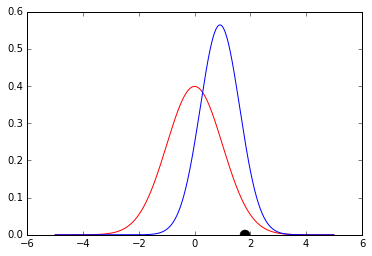

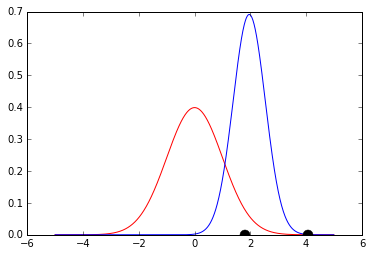

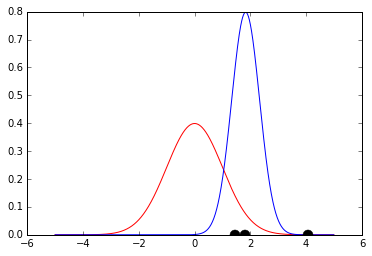

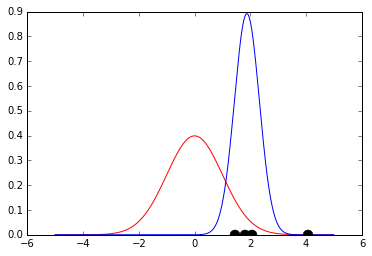

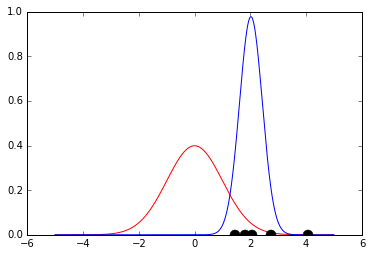

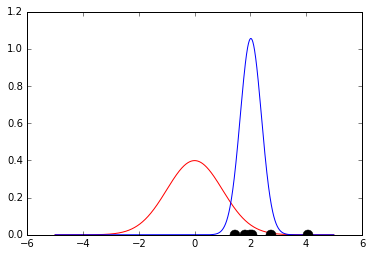

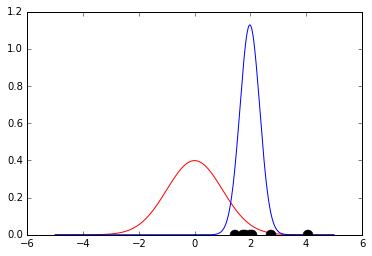

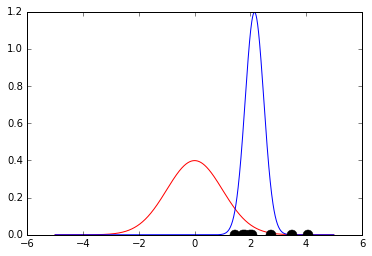

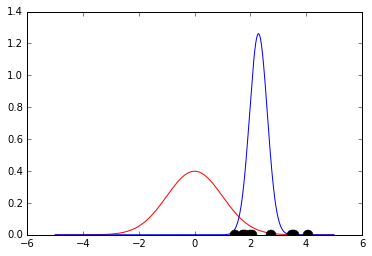

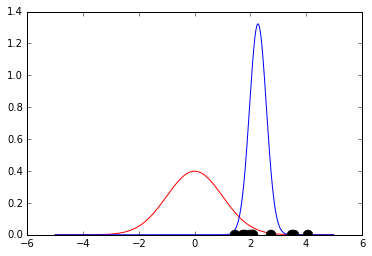

In [3]:
all_c = []
all_d_sq = []
for i in np.arange(x.size):
    d_sq = 1.0/(1.0/b_sq + (i+1.0)/sig_sq)
    c = d_sq*(a/b_sq + x[0:i+1].sum()/sig_sq)
    all_c.append(c)
    all_d_sq.append(d_sq)
    plt.figure()
    plt.plot(plotx,normal_pdf(plotx,a,np.sqrt(b_sq)),'r')
    plt.plot(plotx,normal_pdf(plotx,c,np.sqrt(d_sq)),'b')
    plt.plot(x[0:i+1],np.zeros_like(x[0:i+1]),'ko',markersize=10)

<p>We can also plot the evolution of the posterior mean ($c$) and variance ($d^2$).</p>

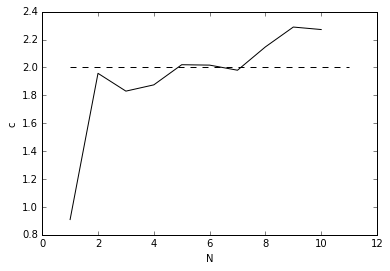

In [4]:
plt.plot(np.arange(x.size)+1,all_c,'k')
plt.plot([1,x.size+1],[true_mu,true_mu],'k--')
plt.xlabel('N')
plt.ylabel('c')

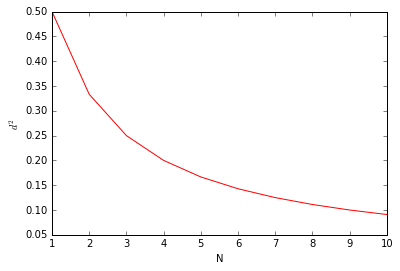

In [5]:
plt.plot(np.arange(x.size)+1,all_d_sq,'r')
plt.xlabel('N')
plt.ylabel('$d^2$')